In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
mileage = df[['Mileage']]
price = df['Price']

In [6]:
regr = linear_model.LinearRegression()
regr.fit(mileage, price)
print('Coefficients: \n', regr.coef_)
print(regr.score(mileage, price))

Coefficients: 
 [-0.1725205]
0.0204634473235


In [7]:
regr.intercept_

24764.559006061681

Equation : y = -0.1725x + 6758.755<br />
R-Score = 0.0205

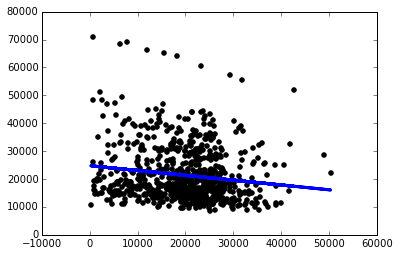

In [8]:
plt.scatter(mileage, price, color='black')
plt.plot(mileage, regr.predict(mileage), color='blue', linewidth=3)

In [9]:
data = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]

In [10]:
regr2 = linear_model.LinearRegression()
regr2.fit(data, price)
print('Coefficients: \n', regr2.coef_)
print(regr2.score(data, price))

Coefficients: 
 [ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03]
0.446264353673


R-Score = 0.44626

In [11]:
def regression_for(combo):
    combo = list(combo)
    input_data = df[combo]
    price = df['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)

In [12]:
import itertools
choices = []
dependent_vars = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
for i in range(7):
    combos = list(itertools.combinations(dependent_vars, i+1))
    for combo in combos:
        regr, score = regression_for(combo)
        choices.append((combo, score))
    

In [13]:
best = sorted(choices, key=lambda x: x[1])[-1]
print(best)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

(('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'), 0.44626435367283801)
[ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03] 6758.7551436


Hard mode attempt

In [14]:
make = pd.get_dummies(df['Make'])

In [15]:
new = pd.merge(make, df, left_index=True, right_index=True)
makecol = new.pop('Make')

In [16]:
model = pd.get_dummies(df['Model'])
new1 = pd.merge(model, new, left_index=True, right_index=True)
modelcol = new1.pop("Model")

In [17]:
trim = pd.get_dummies(df['Trim'])
new2 = pd.merge(trim, new1, left_index=True, right_index=True)
trimcol = new2.pop("Trim")

In [18]:
type_ = pd.get_dummies(df['Type'])
new3 = pd.merge(type_, new2, left_index=True, right_index=True)
typecol = new3.pop("Type")

In [19]:
new3.head()

,Convertible,Coupe,Hatchback,Sedan,Wagon,AWD Sportwagon 4D,Aero Conv 2D,Aero Sedan 4D,Aero Wagon 4D,Arc Conv 2D,...,SAAB,Saturn,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,0,0,0,1,0,0,0,0,0,0,...,0,0,17314.103129,8221,6,3.1,4,1,1,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,17542.036083,9135,6,3.1,4,1,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,16218.847862,13196,6,3.1,4,1,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,16336.913140,16342,6,3.1,4,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,16339.170324,19832,6,3.1,4,1,0,1


In [20]:
new3.columns

Index(['Convertible', 'Coupe', 'Hatchback', 'Sedan', 'Wagon',
       'AWD Sportwagon 4D', 'Aero Conv 2D', 'Aero Sedan 4D', 'Aero Wagon 4D',
       'Arc Conv 2D', 'Arc Sedan 4D', 'Arc Wagon 4D', 'CX Sedan 4D',
       'CXL Sedan 4D', 'CXS Sedan 4D', 'Conv 2D', 'Coupe 2D',
       'Custom Sedan 4D', 'DHS Sedan 4D', 'DTS Sedan 4D', 'GT Coupe 2D',
       'GT Sedan 4D', 'GT Sportwagon', 'GTP Sedan 4D', 'GXP Sedan 4D',
       'Hardtop Conv 2D', 'L300 Sedan 4D', 'LS Coupe 2D', 'LS Hatchback 4D',
       'LS MAXX Hback 4D', 'LS Sedan 4D', 'LS Sport Coupe 2D',
       'LS Sport Sedan 4D', 'LT Coupe 2D', 'LT Hatchback 4D',
       'LT MAXX Hback 4D', 'LT Sedan 4D', 'Limited Sedan 4D', 'Linear Conv 2D',
       'Linear Sedan 4D', 'Linear Wagon 4D', 'MAXX Hback 4D', 'Quad Coupe 2D',
       'SE Sedan 4D', 'SLE Sedan 4D', 'SS Coupe 2D', 'SS Sedan 4D',
       'SVM Hatchback 4D', 'SVM Sedan 4D', 'Sedan 4D', 'Special Ed Ultra 4D',
       'Sportwagon 4D', '9-2X AWD', '9_3', '9_3 HO', '9_5', '9_5 HO', 'AVEO',


In [21]:
def regression_for2(combo):
    combo = list(combo)
    input_data = new3[combo]
    price = new3['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)

In [22]:
import itertools
choices2 = []
dependent_vars = new3.columns
for i in range(len(list(new3.columns))):
    combos = list(itertools.combinations(dependent_vars, i+1))
    for combo in combos:
        regr, score = regression_for2(combo)
        choices2.append((combo, score))

KeyboardInterrupt: 

In [ ]:
best2 = sorted(choices2, key=lambda x: x[1])[-1]
print(best2)
regr, score = regression_for(best[0])
print(regr.coef_, regr.intercept_)

^ Doesn't run